In [1]:
# Import Libraries

# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [2]:
# Loading the dataset

df = pd.read_csv('Flight_Booking.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
# Removing unnecessary column from dataframe

df = df.drop(columns =['Unnamed: 0'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
# Checking the shape of the data

df.shape

(300153, 11)

In [7]:
# Checking the datatypes of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
# Checking the statistical information of the data

df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
# Checking out missing values

df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Data Visualization

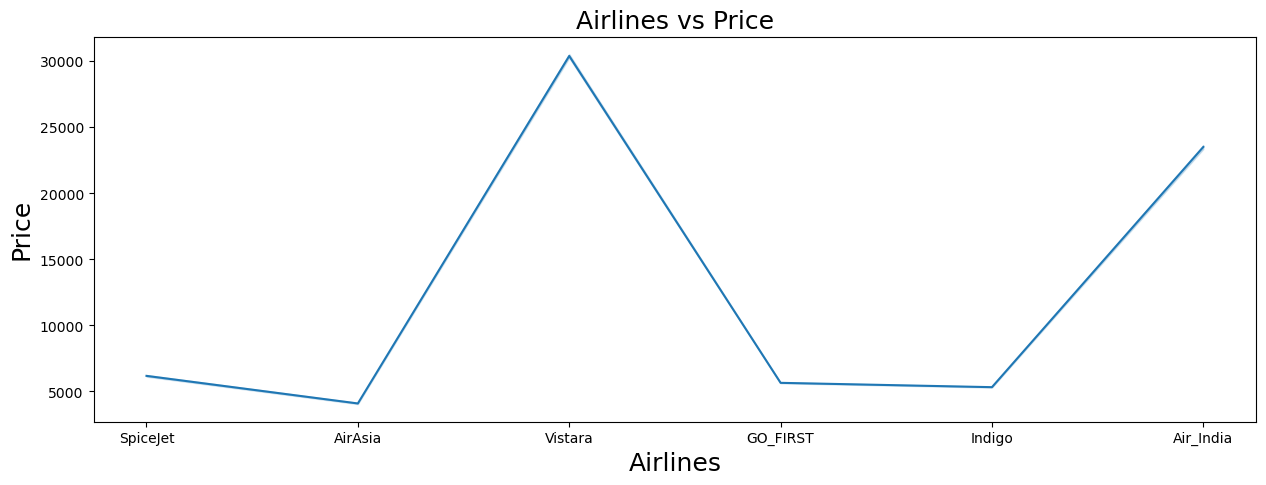

In [10]:
plt.figure(figsize = (15,5))
sns.lineplot(x=df['airline'], y=df['price'])
plt.title('Airlines vs Price', fontsize=18)
plt.xlabel('Airlines', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

In [11]:
#### There is a variation in price with different airlines.

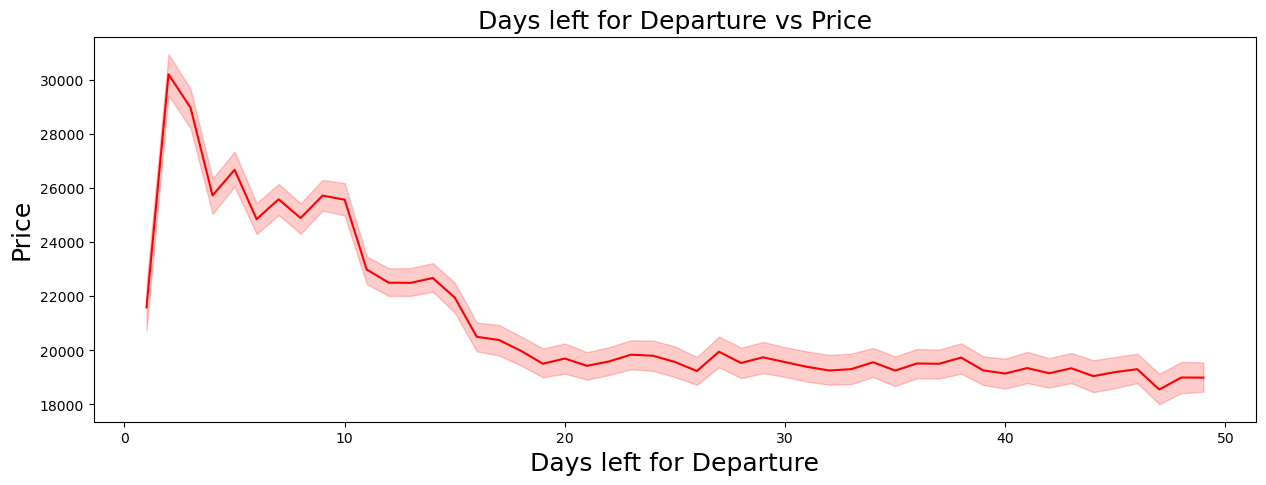

In [12]:
plt.figure(figsize = (15,5))
sns.lineplot(x=df['days_left'], y=df['price'], color='red')
plt.title('Days left for Departure vs Price', fontsize=18)
plt.xlabel('Days left for Departure', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

In [13]:
#### The price of the flight increases as Days left for the departure decreases.

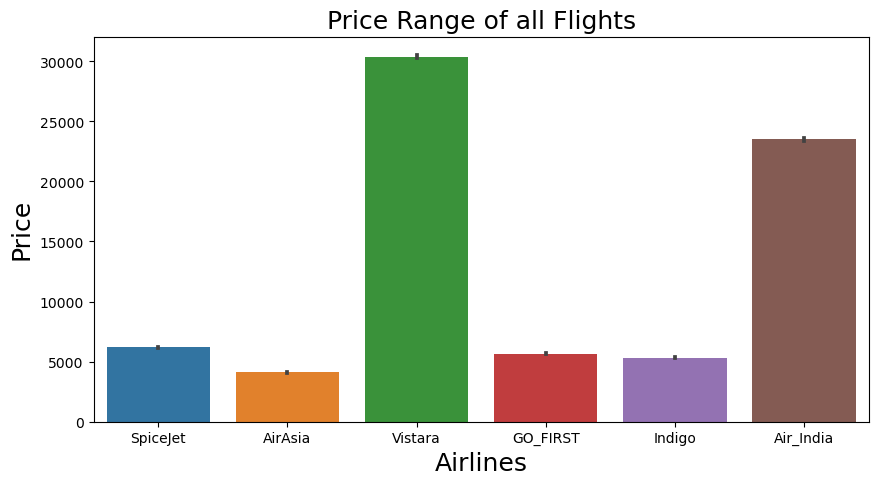

In [14]:
plt.figure(figsize = (10,5))
sns.barplot(x=df['airline'], y=df['price'])
plt.title('Price Range of all Flights', fontsize=18)
plt.xlabel('Airlines', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

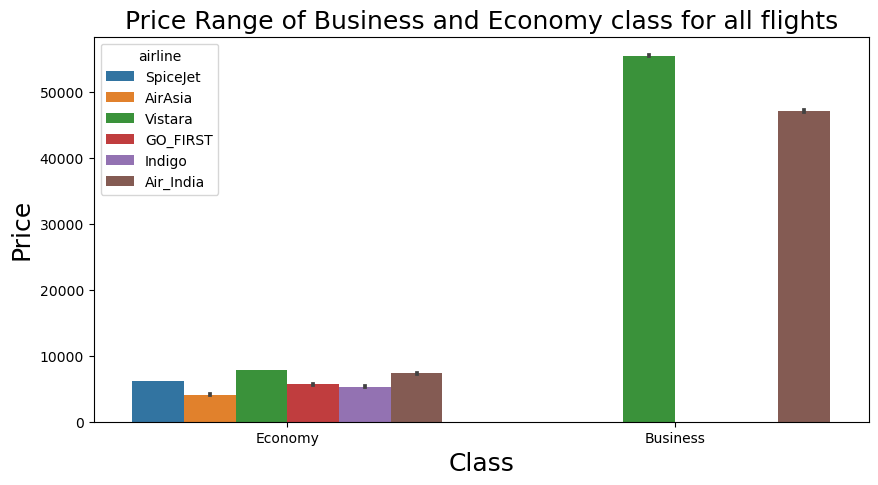

In [15]:
plt.figure(figsize = (10,5))
sns.barplot(data = df, x='class', y='price', hue='airline')
plt.title('Price Range of Business and Economy class for all flights', fontsize=18)
plt.xlabel('Class', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

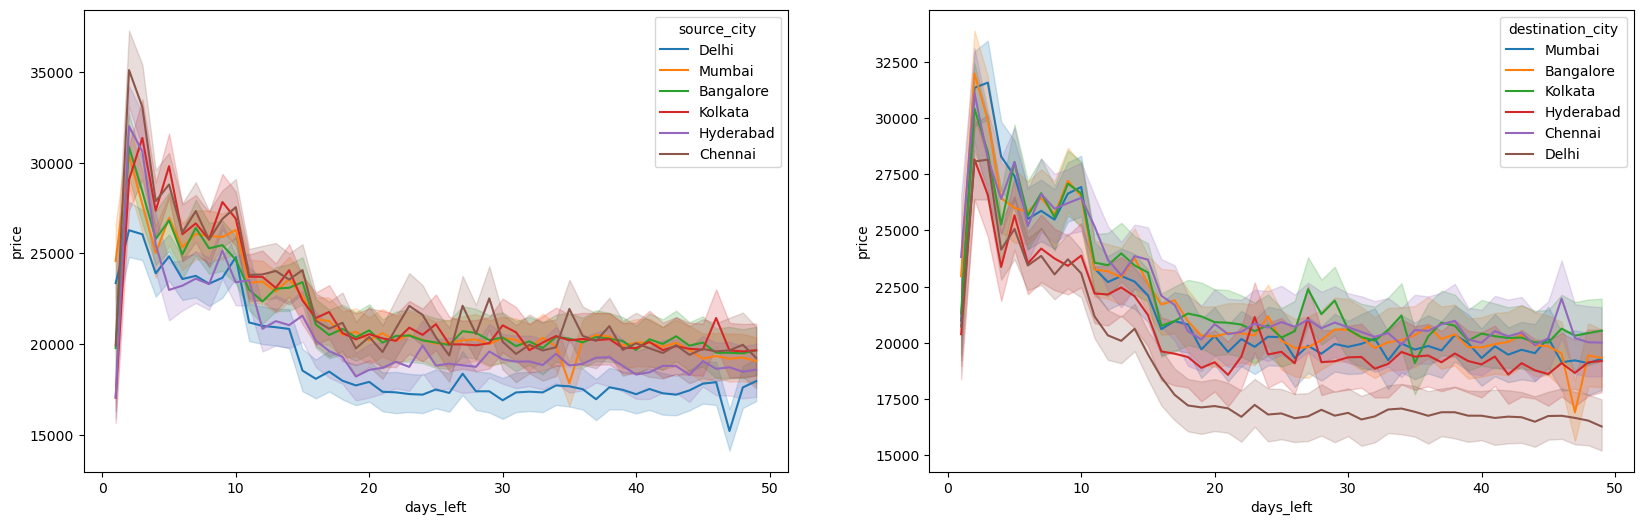

In [16]:
## Range of price of flights with source and destination city according to days left.

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.lineplot(data=df, x='days_left', y='price', hue='source_city', ax=ax[0])


sns.lineplot(data=df, x='days_left', y='price', hue='destination_city', ax=ax[1])


plt.show()

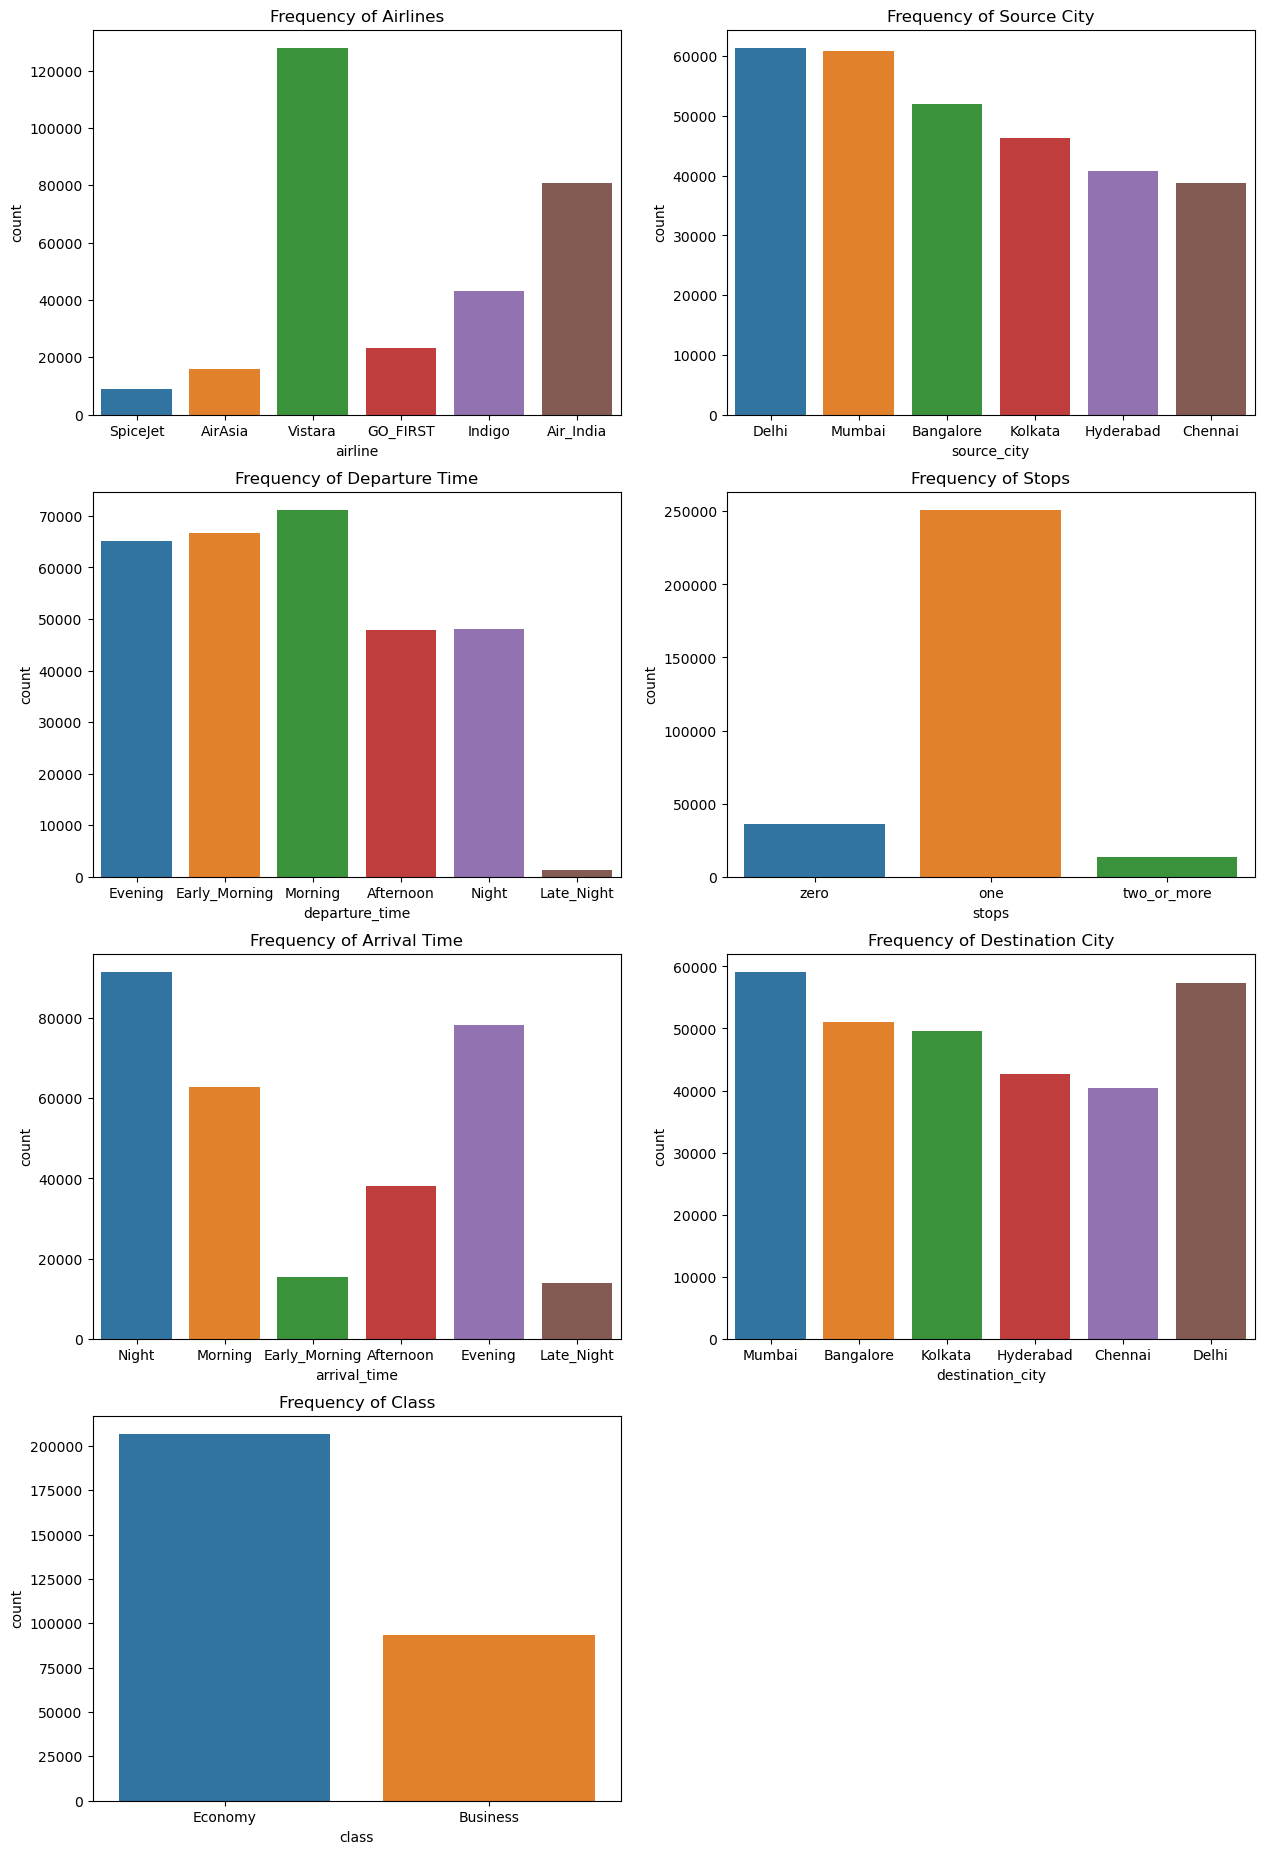

In [17]:
# Visualization of Categorical features with countplot.

plt.figure(figsize = (15,23))

plt.subplot(4,2,1)
sns.countplot(data=df, x='airline')
plt.title('Frequency of Airlines')

plt.subplot(4,2,2)
sns.countplot(data=df, x='source_city')
plt.title('Frequency of Source City')

plt.subplot(4,2,3)
sns.countplot(data=df, x='departure_time')
plt.title('Frequency of Departure Time')

plt.subplot(4,2,4)
sns.countplot(data=df, x='stops')
plt.title('Frequency of Stops')

plt.subplot(4,2,5)
sns.countplot(data=df, x='arrival_time')
plt.title('Frequency of Arrival Time')

plt.subplot(4,2,6)
sns.countplot(data=df, x='destination_city')
plt.title('Frequency of Destination City')

plt.subplot(4,2,7)
sns.countplot(data=df, x='class')
plt.title('Frequency of Class')

plt.show()

#### Label Encoding for categorical features of a dataframe.

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


In [20]:
df = df.drop(columns='flight')

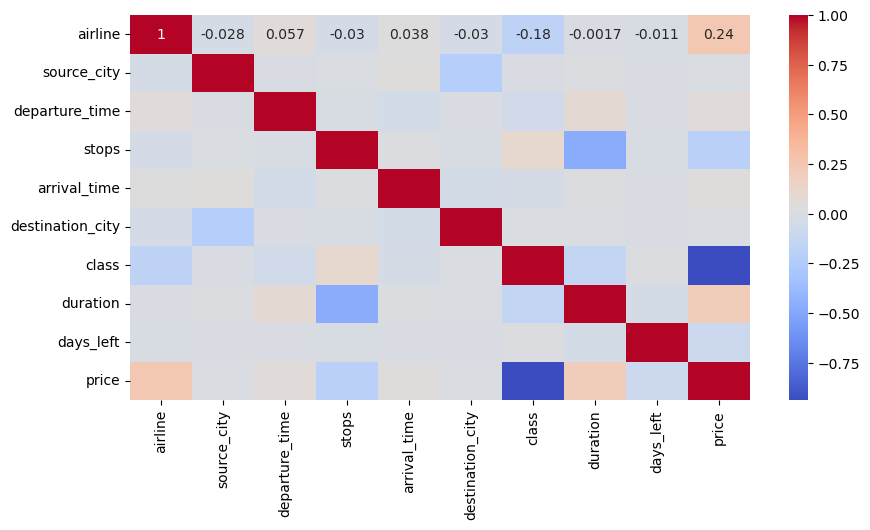

In [21]:
## Correalation graph to see correaltion between features and dependent variable.

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [22]:
## Feature Selection  using VIF(Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [23]:
## VIF should be less than 5. Here all the columns have VIF less than 5.


In [24]:
X = df.drop(columns=['price'])
y = df['price']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc=StandardScaler()

In [29]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Training

In [30]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [31]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    
    print('----------------------------------')
    
    print('Model performance:')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
----------------------------------
Model performance:
- Root Mean Squared Error: 6960.9238
- Mean Absolute Error: 4614.0857
- R2 Score: 0.9052


Lasso
----------------------------------
Model performance:
- Root Mean Squared Error: 6960.9097
- Mean Absolute Error: 4613.7320
- R2 Score: 0.9052


Ridge
----------------------------------
Model performance:
- Root Mean Squared Error: 6960.9238
- Mean Absolute Error: 4614.0931
- R2 Score: 0.9052


K-Neighbors Regressor
----------------------------------
Model performance:
- Root Mean Squared Error: 3646.1044
- Mean Absolute Error: 1773.5024
- R2 Score: 0.9740


Decision Tree
----------------------------------
Model performance:
- Root Mean Squared Error: 3448.6410
- Mean Absolute Error: 1156.6585
- R2 Score: 0.9767


Random Forest Regressor
----------------------------------
Model performance:
- Root Mean Squared Error: 2730.3652
- Mean Absolute Error: 1077.4438
- R2 Score: 0.9854


XGBRegressor
---------------------------

### Model Comparison

In [32]:
pd.DataFrame(list(zip(model_list, r2_list)), 
             columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.985420
4,Decision Tree,0.976740
6,XGBRegressor,0.976134
3,K-Neighbors Regressor,0.974000
7,AdaBoost Regressor,0.932901
1,Lasso,0.905237
2,Ridge,0.905236
0,Linear Regression,0.905236


### Hyperparameter tuning - Random Forest

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 100, num = 10)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [35]:
random_search_rf= RandomizedSearchCV(estimator=RandomForestRegressor(), 
                                     param_distributions=random_grid, cv=5, n_jobs = -1)

In [36]:
random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 64, 118, 173, 227,
                                                         282, 336, 391, 445,
                                                         500]})

In [37]:
best_rf = random_search_rf.best_estimator_
y_pred_rs = best_rf.predict(X_test)

In [42]:
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_pred_rs)

In [43]:
model_test_r2

0.9855826768796532

In [40]:
## Here, we can conclude that Random Forest Regressor is better working model with accuracy of 98%.